# EDSA - Twitter Sentiment Classification
<h3> Climate Change Belief Analysis 2022 </h3>
<h3>Predict an individual’s belief in climate change based on historical tweet data </h3>
</br>


<figure>
<img src="https://s2.reutersmedia.net/resources/r/?m=02&d=20190402&t=2&i=1372650403&r=LYNXNPEF310GG" width="800px">
    <figcaption><p text_align = "center"><i>photo by Reuters</i></p></figcaption>
</figure>

</br>

<a id="1"></a>

##  1. Introduction:
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

Our goal within this notebook is creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

</br>

## Problem Domain: Climate Change
Climate is the average weather in a place over many years. Climate change is a shift in those average conditions.

The rapid climate change we are now seeing is caused by humans using oil, gas and coal for their homes, factories and transport.

When these fossil fuels burn, they release greenhouse gases - mostly carbon dioxide (CO2). These gases trap the Sun's heat and cause the planet's temperature to rise.


</br>


<a id="1.1"></a>
## **1.1 Problem Statement:**
Build a Natural Language Processing model to classify whether or not a person believes in climate change, based on their novel tweet data.

</br>

<a id="1.2"></a>
## 1.2 **Problem Framework:**

###  **Data**:

>    The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes
Class Description 

 **Description**

2 News: the tweet links to factual news about climate change 

1 Pro: the tweet supports the belief of man-made climate change 

0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change 

-1 Anti: the tweet does not believe in man-made climate change 

</br>

**Key Variable definitions:**

- ***sentiment***: Sentiment of tweet

- ***message***: Tweet body

- ***tweetid***: Twitter unique id




 <a id="one"></a>
## 2. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section the required packages are imported, and briefly discuss, the libraries that will be used throughout the analysis and modelling. |

In [45]:
# Required packages to save model
import pickle
# Import Libraries for Data Visualisation
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import ListedColormap
%matplotlib inline

# Import libraries for Natural Languge Processing
import re
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from html.parser import HTMLParser
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
stop = stopwords.words('english')

# Import library for Feature Extraction
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

# Import library for train test split
from sklearn.model_selection import train_test_split

# Import Machine Learning algorithms
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

# Import libraries for model evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()

# Import warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Qween\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Qween\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<a id="3"></a>
# **3. Importing the dataset**

1. Train.csv:  Dataset that contains all the variables that should be used to train the model

2. Test.csv :  Dataset that contains variables that will be used to test the model

In [3]:
#load the training and test data set
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

 <a id="three"></a>
## 4. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

**4.1 Exploratory Data Analysis (EDA) :**  After loading our dataset, we first begin with the next stage which is the **EDA**, to aid our better understanding of the dataset that we are working with. And to also gain insights about the `features` and `labels` by performing `Univariate` or `Multivariate` , `Non-graphical` or `Graphical` Analysis".

We will take a quick look at the first few rows of the `training` and `testing` dataset to have an overview of our features and labels (using `pd.head()` method)

In [4]:
#The first five rows of the traing dataset
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [5]:
# View the first 5 rows of the test data
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


### DataSet Summary

**Step 1**: We will take a look at the shape of the dataframe to see the amount of data we are working with, the **rows** and the **columns**

In [6]:
#checking the shape of the training dataframe
train.shape
print("The training dataset has {0} rows and {1} columns".format(train.shape[0], train.shape[1]))

The training dataset has 15819 rows and 3 columns


<i>Looking at the shape of the dataframe we have `15819` rows and `3` columns </i>

<b>Step 2:</b> let's take a look at the data types in the dataframe using `pd.info()` to get more information about the dataframe

In [7]:
#checking the information of the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


<i>Looking at the above output we can see that we have two `int64` and one `object` </i>

<b>Step 3:</b> Let's check for any null values in the Train & Test dataset

In [8]:
#checking null values in the training data
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [9]:
test.isnull().sum(axis=0)

message    0
tweetid    0
dtype: int64

<i>We can see that we have **0** null values in the training data, which means we don't have any null values in the test and train datasets.</i>

<a id="4"></a>

### 4.2 Closer Examination of the Target Variable, Sentiment
</br>
</br>
The following section provides an overview of the given data. We look at  some key inights of the raw data where we look at sentiment distribution of the data. This has been illustrated using graphs.  We also visualise word frequency of messages of the unprocessed train and test data.

<b>Step 1:</b> Let's take a closer look on our output label, `sentiment`.

In [10]:
#pip install wordcloud

In [11]:
#checking for unique values 
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

**Based on the results, we have 4 unique values in the label.**

    1 Pro: the tweet supports the belief of man-made climate change
    2 News: the tweet links to factual news about climate change
    0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
    -1 Anti: the tweet does not believe in man-made climate change

In [12]:
#pip install pandas

<b>Step 2:</b> Let's count and plot the distribution of each unique value in the output label </b>

Text(0.5, 1.0, 'Class Distributions')

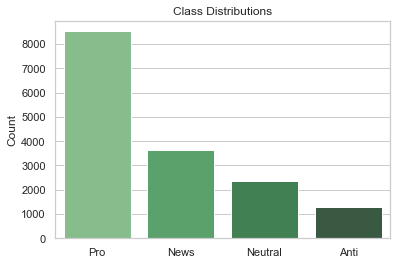

In [13]:
# Create class distribution dataframe
class_dist = pd.DataFrame(list(train['sentiment'].value_counts()),
                          index=['Pro', 'News', 'Neutral', 'Anti'],
                          columns=['Count'])

# Plot class distribution
sns.set(style="whitegrid")
sns.barplot(x=class_dist.index, y=class_dist.Count, 
           palette="Greens_d")
plt.title('Class Distributions')

In [14]:
# A count of each class of sentiment in the train data set
class_dist

,Count
Pro,8530
News,3640
Neutral,2353
Anti,1296


**Interpretation**

The above plot comfirms that:

* There are no missing values in the data.

* Class distribution is skewed to the 'Pro' sentiment.

* The sum of tweets relating to News, Neutral & Anti is less than half of the total tweets.

The plot shows that the highest proportion of the tweets supports the belief of man-made climate change

**Note:** The label data appears to be `unbalanced` {i.e skewed to the left "Pro" Sentiment} and it's important to have a balanced label distribution to get a better performing model.

<b>Step 3:</b> Let's count and plot the distribution of each unique value in the output label </b>Now moving on let's explore our `features` to gain more insight.</b>

In [15]:
#checking the tweetid to see if there are any duplicate id's
train['tweetid'].nunique()

15819

In [16]:
train['tweetid'].duplicated().sum()

0

<i>**Observation:** We don't have any duplicate value from the `tweetid`column </i>

<b>Step 4:</b> Moving on let's take a closer look into the `message` column which contains the tweets

In [17]:
#taking a closer look on the message column
train['message']

0        PolySciMajor EPA chief doesn't think carbon di...
1        It's not like we lack evidence of anthropogeni...
2        RT @RawStory: Researchers say we have three ye...
3        #TodayinMaker# WIRED : 2016 was a pivotal year...
4        RT @SoyNovioDeTodas: It's 2016, and a racist, ...
                               ...                        
15814    RT @ezlusztig: They took down the material on ...
15815    RT @washingtonpost: How climate change could b...
15816    notiven: RT: nytimesworld :What does Trump act...
15817    RT @sara8smiles: Hey liberals the climate chan...
15818    RT @Chet_Cannon: .@kurteichenwald's 'climate c...
Name: message, Length: 15819, dtype: object

<b>Observation:</b> Based on what we are seeing from the `message` column which contains the tweets, it shows the presence of some unwanted characters which may prove to be redundant when building our model. <br> <br>In the next section, we would have a quick visual on our data and then proceed to cleaning as required.

 <a id="three"></a>
## 5. DATA VISUALIZATION
<a href=#cont>Back to Table of Contents</a>

### 5.1 Visualize Raw Data

<b>Step 1:Quick visualization of raw data with wordcloud. Install wordcloud

pip install WordCloud

**WordCloud Visualization**

We will create a wordcloud to see the high frequency tokens for all the sentiment

(-0.5, 399.5, 199.5, -0.5)

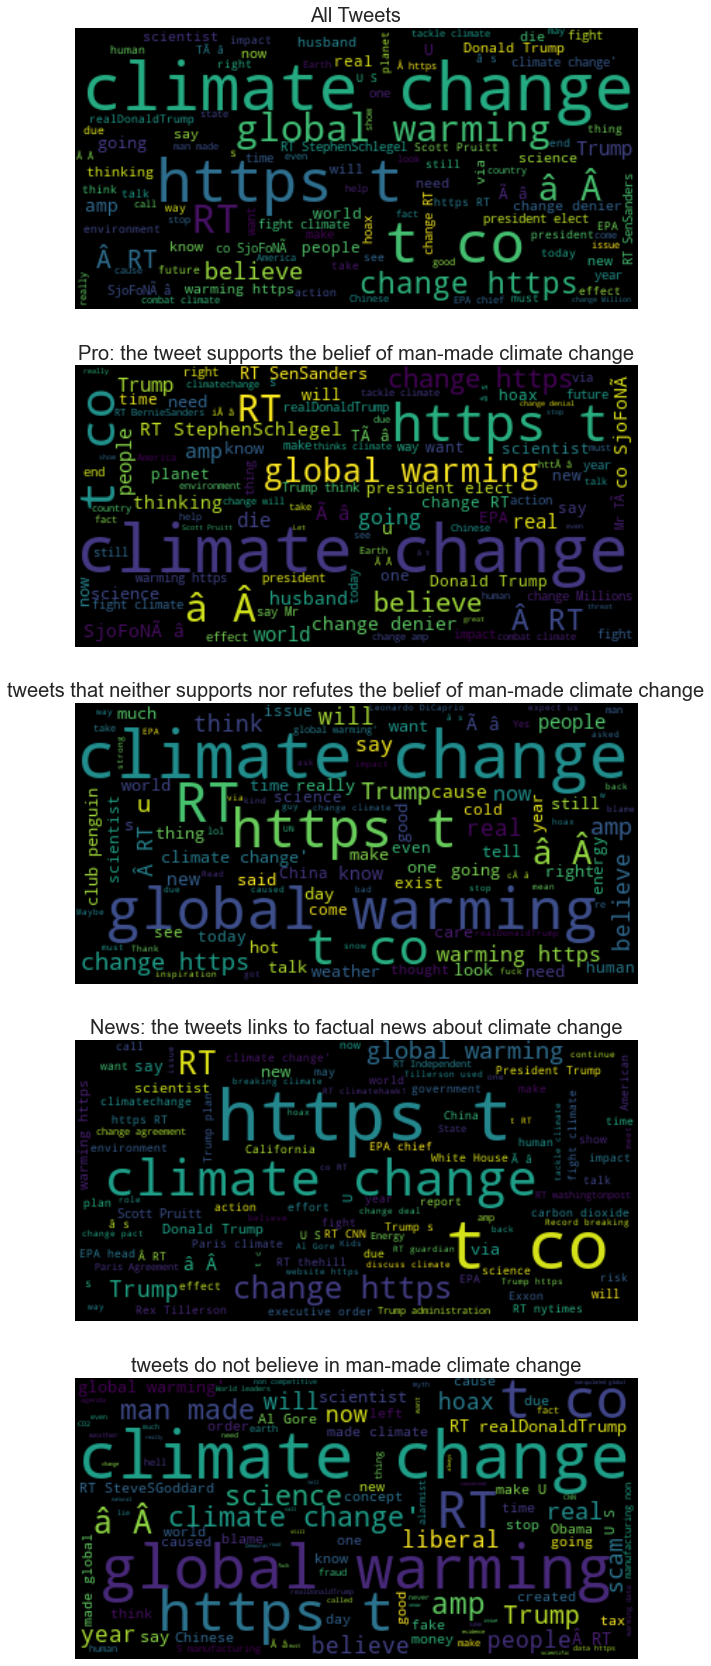

In [18]:
# Start with one review:
#classifying the tweets into it's category class
df_PRO = train[train['sentiment']==1]
df_NSR = train[train['sentiment']==0]
df_NEWS = train[train['sentiment']==2]
df_NPRO = train[train['sentiment']==-1]

#looping through each category of the tweet and joining it as a string
tweet_All = " ".join(review for review in train.message)
tweet_PRO = " ".join(review for review in df_PRO.message)
tweet_NSR = " ".join(review for review in df_NSR.message)
tweet_NEWS = " ".join(review for review in df_NEWS.message)
tweet_NPRO = " ".join(review for review in df_NPRO.message)

fig, ax = plt.subplots(5, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_All)
wordcloud_PRO = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_PRO)
wordcloud_NSR = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_NSR)
wordcloud_NEWS = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_NEWS)
wordcloud_NPRO = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_NPRO)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=20)
ax[0].axis('off')
ax[1].imshow(wordcloud_PRO, interpolation='bilinear')
ax[1].set_title('Pro: the tweet supports the belief of man-made climate change',fontsize=20)
ax[1].axis('off')
ax[2].imshow(wordcloud_NSR, interpolation='bilinear')
ax[2].set_title('tweets that neither supports nor refutes the belief of man-made climate change',fontsize=20)
ax[2].axis('off')
ax[3].imshow(wordcloud_NEWS, interpolation='bilinear')
ax[3].set_title('News: the tweets links to factual news about climate change',fontsize=20)
ax[3].axis('off')
ax[4].imshow(wordcloud_NPRO, interpolation='bilinear')
ax[4].set_title('tweets do not believe in man-made climate change',fontsize=20)
ax[4].axis('off')

**Observation**: There is a considerable amount of  frequently appearing tokens such as:
`Climate change`and `global warming` in all the cartegories of the tweets and we can see lots of `http` which suggests that cleaning of the data is highly recommended.

Next, we would extract all the hashtags with respect to the various sentiments and  we would be doing this for the pro and anti climate change tweets.

### 5.2  Data Cleaning

Before applying any Machine Learning model to a dataset, we need to first take a look at our data to see if it is in the right state that we want it to be and if further cleaning of the data set will be required. well in  our case, the data set will be preprocessed before being fit to any machine learning model.

**Pre-processing text data**

we will be cleaning our data with following steps below.

- Remove punctuations
- Tokenization - Converting a sentence into list of words
- Remove stopwords - a list of frequently appearing english words in sentences
- Lammetization/stemming - Tranforming any form of a word to its root word

**Step 1:** Create a new dataframe with only tweets

In [20]:
# Extract tweets from dataframe & creating a new dataframe with only tweets
raw_tweets = train['message']

# View top 5 rows of raw_tweets
raw_tweets[3010:3015]

3010    sorry at drivenorth\nbut at communism_kills\ny...
3011    RT @6esm: Climate change, myth and religion: F...
3012    As reported by the latest claims, the truth ar...
3013    @AJEnglish @derrickg745 It's ok According to t...
3014    U really out here on Twitter expecting everybo...
Name: message, dtype: object

**Step 2:** We will be using the Regex library to clean the raw tweets dataframe:


In [21]:
# Replace email addresses with 'email'
tweets = raw_tweets.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Remove unicode strings
tweets = tweets.str.replace(r'(\\u[0-9A-Fa-f]+)', '')
tweets = tweets.str.replace(r'[^\x00-\x7f]', '')

# Convert any url to URL
tweets = tweets.str.replace('((www\.[^\s]+)|(https?://[^\s]+))',
                            'website')

# Remove special characters, numbers, punctuation
tweets = tweets.str.replace('[^a-zA-Z#@]+',' ')

# Remove additional white spaces
tweets = tweets.str.replace(r'\s+', ' ')
tweets = tweets.str.replace(r'^\s+|\s+?$', '')

# Change words to lower case
tweets = tweets.str.lower()

# Remove stop words from tweets
stop_words = set(stopwords.words('english'))

tweets = tweets.apply(lambda x: ' '.join(
    word for word in x.split() if word not in stop_words))

In [22]:
# Creating a dataframe from the cleaned up message column
tweets_df = pd.DataFrame(tweets)

# Add sentiment column to the tweets dataframe
tweets_df['sentiment'] = train['sentiment']

# View the top 5 rows of tweets
tweets_df.head()

,message,sentiment
0,polyscimajor epa chief think carbon dioxide ma...,1
1,like lack evidence anthropogenic global warming,1
2,rt @rawstory researchers say three years act c...,2
3,#todayinmaker# wired pivotal year war climate ...,1
4,rt @soynoviodetodas racist sexist climate chan...,1


 ### 5.3 Visualising a corpus for each sentiment class:

Now we will create a corpus for each sentiment class. In linguistics, a corpus is a large and structured set of texts. In corpus linguistics, they are used to do statistical analysis and hypothesis testing, checking occurrences or validating linguistic rules within a specific language territory.

In [23]:
# Create a Corpus for every class sentiment 
news_tweets = ' '.join([text for text in tweets_df['message']
                        [tweets_df['sentiment'] == 2]])
pro_tweets = ' '.join([text for text in tweets_df['message']
                       [tweets_df['sentiment'] == 1]])
neutral_tweets = ' '.join([text for text in tweets_df['message']
                           [tweets_df['sentiment'] == 0]])
anti_tweets = ' '.join([text for text in tweets_df['message']
                        [tweets_df['sentiment'] == -1]])

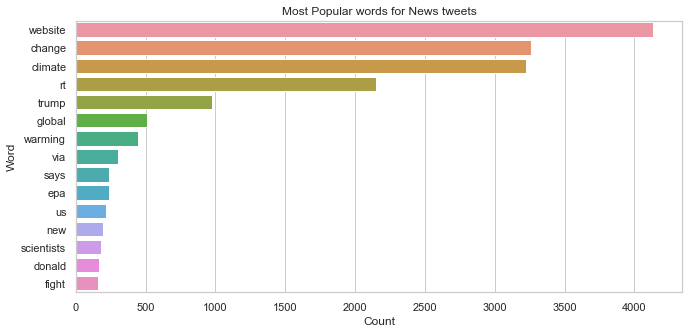

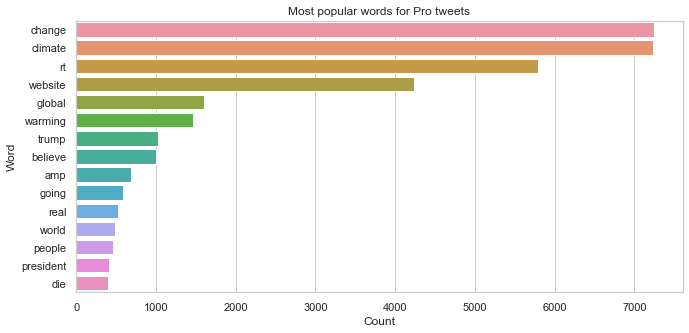

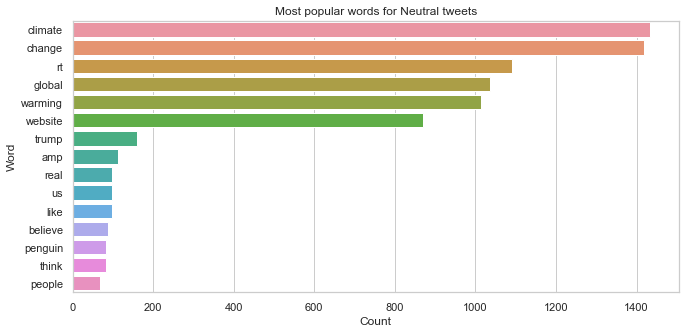

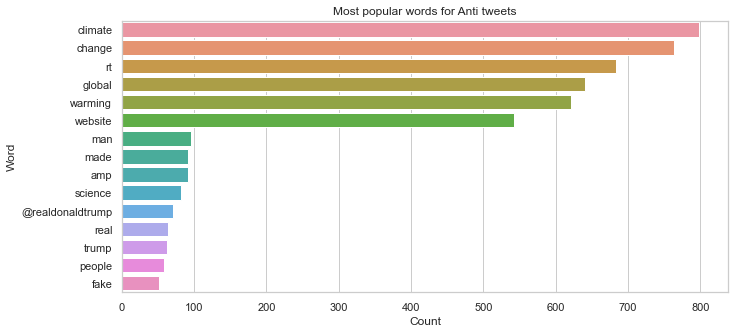

In [24]:
# Visualising each sentiment class according to the count of words
full_title = ['Most Popular words for News tweets',
              'Most popular words for Pro tweets',
              'Most popular words for Neutral tweets',
              'Most popular words for Anti tweets']

tweet_list = [news_tweets, pro_tweets,
              neutral_tweets, anti_tweets]

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(tweet_list):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent.split(' '))
    df = pd.DataFrame({'Word': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Word', x='Count')
    plt.title(full_title[i])
    plt.show()

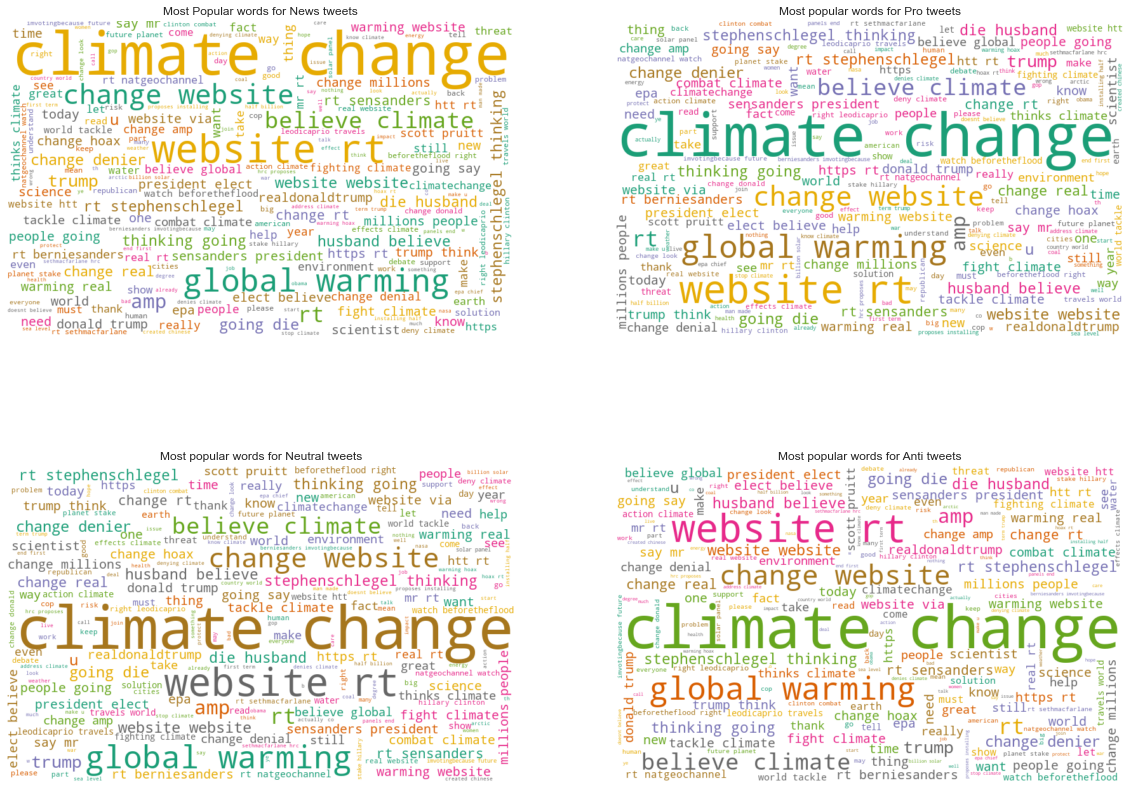

In [25]:
# Create word clouds of the most common words in each sentiment class
wc = WordCloud(width=800, height=500, 
               background_color='white', colormap='Dark2',
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots 
for i in range(0, len(tweet_list)):
    wc.generate(tweet_list[1])
    
    plt.subplot(2, 2, i + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(full_title[i])
    
plt.show()


***Observations***:
* The most popular words in all 4 classes are Climate Change, Global Warming.

***Insights***:
* There is some unnecessary data. The words http, https, website, co & RT are prominent, but will not assist us in our classification.


* Also, the top 5 words in all classes are similar, except for the News class, in which the word 'Trump' features prominently.

### 5.4 **Exploring the impact of Handles on the sentiment classes:**
A Twitter handle is the username that appears at the end of your unique Twitter URL. Twitter handles appear after the @ sign in your profile URL and it must be unique to your account. A Twitter name, on the other hand, is simply there to help people find the company they're looking for.

In [27]:
# Creating a function to extract handles from tweets
def extract_handles(x):
    """ This function finds handles in a 
        tweet and returns them as a list"""
    handles = []
    for i in x:
        h = re.findall(r'@(\w+)', i)
        handles.append(h)
        
    return handles

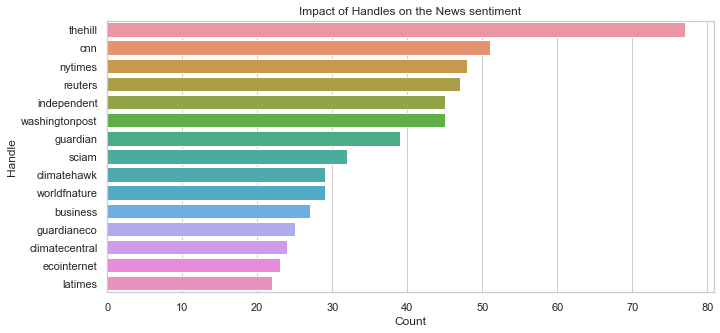

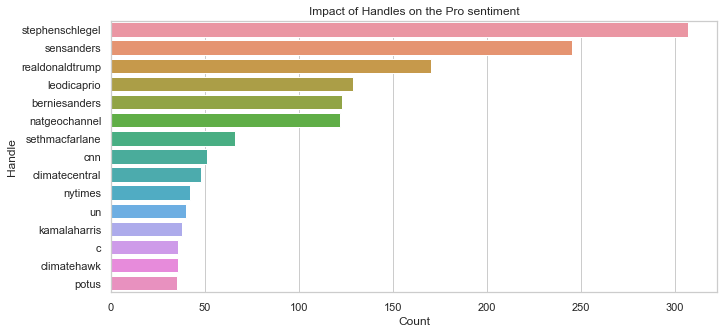

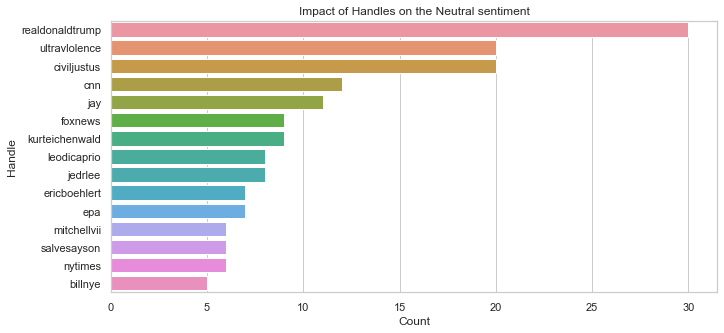

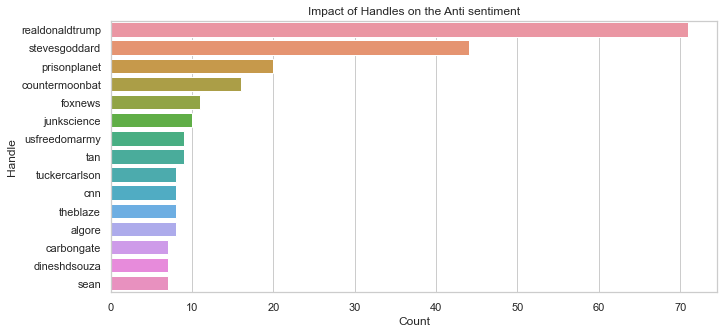

In [28]:
# Extracting handles from tweets
news_h = extract_handles(tweets_df['message']
                              [tweets_df['sentiment'] == 2])
pro_h = extract_handles(tweets_df['message']
                          [tweets_df['sentiment'] == 1])
neutral_h = extract_handles(tweets_df['message']
                              [tweets_df['sentiment'] == 0])
anti_h = extract_handles(tweets_df['message']
                          [tweets_df['sentiment'] == -1])

# Unnesting list
handles = [sum(news_h, []), sum(pro_h, []), sum(neutral_h, []),
           sum(anti_h, [])]

# Visualising the Handles
full_title = ['Impact of Handles on the News sentiment',
              'Impact of Handles on the Pro sentiment',
              'Impact of Handles on the Neutral sentiment',
              'Impact of Handles on the Anti sentiment']

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(handles):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Handle': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Handle', x='Count')
    plt.title(full_title[i])
    plt.show()

**Notes:**

***Observations***:

* Politically inclined verified twitter users have a great influence on the sentiment/perception of the public on climate
* Trump features most for most popular Anti & Neutral tweets. 
* The most popular News handles are actual news broadcaster accounts.
* The most popular Pro handles seem to be celebrity accounts & news accounts.



***Insights***:
* Celebrities have been raising climate change as an issue to increase public awareness.

* Most popular trends handles are American, as most Twitter users reside in the United States of America, 64.2%. 

* A very popular news media in the US, Fox News, does not appear in the positive sentiment. This may be due to the shared public perception that they support Republican policies in the United States of America.

### 5.5 Exploring the impact of Hashtags on the sentiment classes:
People use the hashtag symbol (#) before a relevant keyword or phrase in their Tweet to categorize those Tweets and help them show more easily in Twitter search. Clicking or tapping on a hashtagged word in any message shows you other Tweets that include that hashtag. Hashtags can be included anywhere in a Tweet.

In [29]:
# Creating a function to extract hashtags from tweets
def extract_hashtags(x):
    """ The following function finds hashtags on a 
        tweet and returns them as a list"""
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
        
    return hashtags

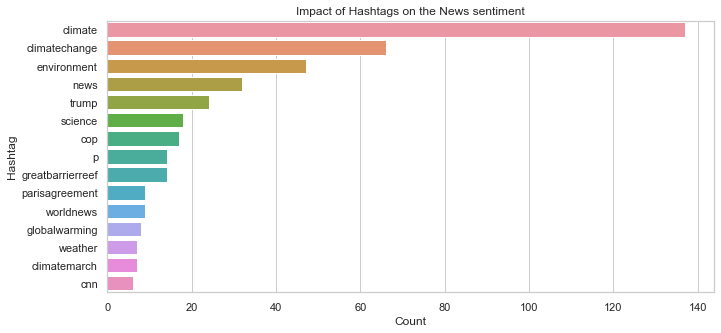

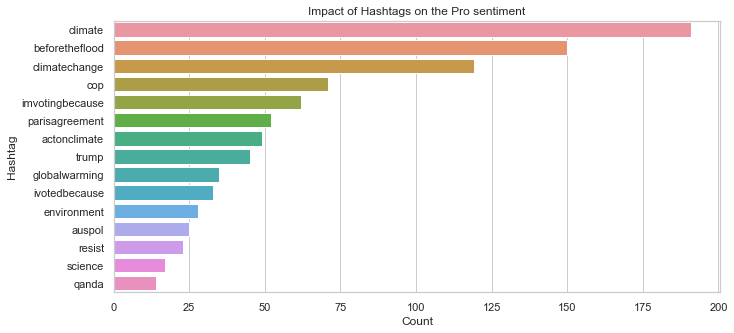

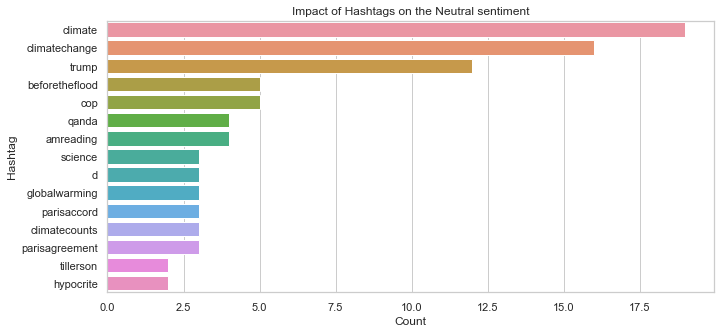

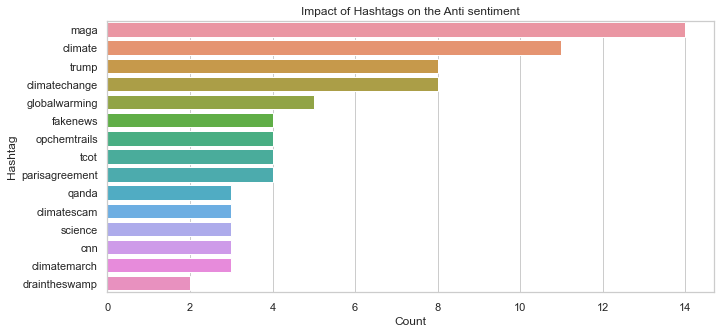

In [30]:
# Extracting hashtags from tweets
news_ht = extract_hashtags(tweets_df['message']
                              [tweets_df['sentiment'] == 2])
pro_ht = extract_hashtags(tweets_df['message']
                          [tweets_df['sentiment'] == 1])
neutral_ht = extract_hashtags(tweets_df['message']
                              [tweets_df['sentiment'] == 0])
anti_ht = extract_hashtags(tweets_df['message']
                          [tweets_df['sentiment'] == -1])

# Unnesting list
hashtags = [sum(news_ht, []), sum(pro_ht, []),
            sum(neutral_ht, []),sum(anti_ht, [])]

# Visualising the Hashtags
full_title = ['Impact of Hashtags on the News sentiment',
              'Impact of Hashtags on the Pro sentiment',
              'Impact of Hashtags on the Neutral sentiment',
              'Impact of Hashtags on the Anti sentiment']

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(hashtags):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Hashtag': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Hashtag', x='Count')
    plt.title(full_title[i])
    plt.show()

**Observations:**
* The hashtag "MAGA" had the greatest impact on Anti Sentiment. Make America Great Again" or MAGA is a campaign slogan used in American politics popularized by Donald Trump in his successful 2016 presidential campaign.
* And ofcourse the #hashtag trump had the 3rd biggest impact on Anti sentiment
* Generally the public have a negeative sentiment on the word climate as seen in the Anti Sentiment chart
* The top 5 hashtags are generally similar, although there seem to be words here that are irrelevant, eg. single letters like 'd', 'p' & words like 'maga' & 'tcot' 

#### Now we will clean up the Hashtags, to get a clearer picture of the most prominent ones

In [31]:
# Function to extract hashtags - not based on Sentiment
def extract_hashtags(tweet):
    '''Provides a tweet and extract hashtags from it'''
    hashtags_only = []
    if len(re.findall("(#[^#\s]+)", tweet)) > 0:
        hashtags_only.append(re.findall("(#[^#\s]+)",
                                        tweet))
    else:
        hashtags_only.append(["0"])
    return hashtags_only[0]

In [32]:
# Creating a dataframe to store the hashtags & visualise them
hashtag_df = train.copy()
hashtag_df['tweet_hashtags'] = hashtag_df['message'].map(extract_hashtags)

In [33]:
# Now we will extract the hashtags to a list
all_hashtags = hashtag_df['tweet_hashtags'].tolist()

# Next we observe that our all_hashtags is a list of lists...lets change that
cleaned_hashtags = []
for i in all_hashtags:
    for j in i:
            cleaned_hashtags.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_hashtag_series = pd.Series(cleaned_hashtags)
hashtag_counts = cleaned_hashtag_series.value_counts()

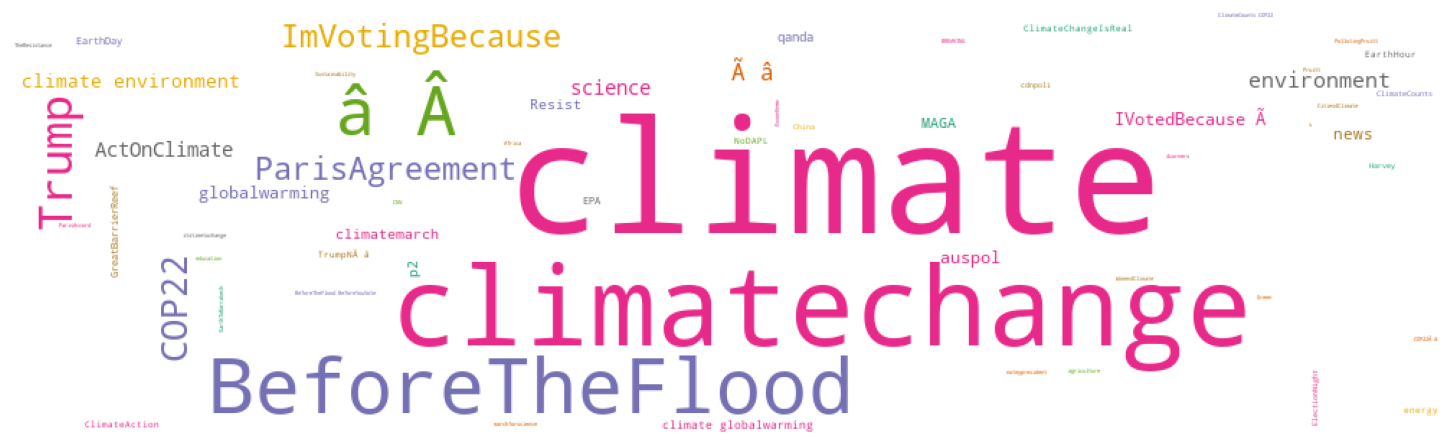

In [35]:
# Changing the series to an ndarray
hashes = cleaned_hashtag_series.values
hashes = hashes.tolist()

# Convert list to one string with all the words
hashes_words = " ".join(hashes)

# Generate the wordcloud. The max_words argument controls the number of words on the cloud
wordcloud = WordCloud(width=1000, height=300,relative_scaling=1.0
                      ,background_color='white', colormap='Dark2',
                      max_words=100).generate(hashes_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**Notes:**

***Observations***:
* We can see the top hashtags more clearly now. 

***Insights***:
* The top 6 hashtags are: 
    1. climate
    2. climatechange
    3. BeforeTheFlood
    4. Trump
    5. Paris Agreement
    6. I'm voting because



* The hashtags also give us an indication of the time the data was gathered, i.e. the documentary called 'Before the Flood', where actor Leonardo DiCaprio meets with scientists, activists and world leaders to discuss the dangers of climate change and possible solutions was released in October 2016.

## 6. Data Processing and Engineering


## 7. Feature Engineering

## 8. Modeling building

In [36]:
# preparing our training X/text for vectorization
X = train['message']
y = train['sentiment']

In [37]:
Xt=test['message']

In [38]:
#We then vectorize of text data 
count_vec = CountVectorizer(min_df=1,max_df=0.9,ngram_range=(1, 2))
X_vec = count_vec.fit_transform(X)
test_vec = count_vec.fit_transform(Xt)

In [39]:
# split data to Train/Test set
X_train, X_test, y_train, y_test= train_test_split(X_vec, y, test_size=0.17218, random_state=42)

#### Training the bernoulliNB Model

In [46]:
BernNB = BernoulliNB(alpha=1.0)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect, y_pred))

BernoulliNB()
0.6479441997063142


#### Training the ComplementNB Model

In [47]:
from sklearn.naive_bayes import ComplementNB
comp = ComplementNB(alpha=0.01)
comp.fit(X_train, y_train)
print(print)

y_expect = y_test
y_pred = comp.predict(X_test)
print(accuracy_score(y_expect, y_pred))

<built-in function print>
0.6754772393538914


#### Training the MultinomialNB Model

In [48]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
model = MultinomialNB(alpha=0.01,fit_prior=True, class_prior=None)
model.fit(X_train, y_train)
print(model)

y_expect = y_test
y_pred = model.predict(X_test)
print(accuracy_score(y_expect, y_pred))

MultinomialNB(alpha=0.01)
0.6361967694566814


#### Training the the StackingClassifier

In [50]:
from sklearn.ensemble import StackingClassifier
sc = StackingClassifier(estimators =[('COMPLEMENT', comp),('MultinomialNB', model),
                                    ('Bernoulli', BernNB)],
    final_estimator= model,
    n_jobs=-1,
    passthrough=True)

In [53]:
test_vec.shape

(10546, 107963)

## 9. Model Performance


In [51]:
# Refining the train-test split for validation
sc.fit(X_train,y_train)
y_pred = sc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.32      0.77      0.45       233
           0       0.39      0.51      0.44       365
           1       0.90      0.59      0.71      1528
           2       0.72      0.85      0.78       598

    accuracy                           0.65      2724
   macro avg       0.58      0.68      0.60      2724
weighted avg       0.75      0.65      0.67      2724



In [ ]:
#pip install StandardScaler

## 10. Conclusion

## 11. Export